In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
drug=pd.read_csv("/Users/Mehr/Desktop/data/drug.csv",dtype={'patient_id':'int8',
                                                            'drugName':'category',
                                                            "condition":"category",
                                                            "review":"str",
                                                            "rating":"int8",
                                                            'usefulCount':'int8',
                                                            'review_length':'int16'})


drug['date'] = pd.to_datetime(drug['date'])
drug_original=pd.read_csv("/Users/Mehr/Desktop/data/drug.csv")
drug.drop(['Unnamed: 0','patient_id'],axis=1,inplace=True)



In [2]:
drug.head()


,drugName,condition,review,rating,date,usefulCount,review_length
0,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10,2012-02-28,22,68
1,Mesalamine,"crohn's disease, maintenance","""my son has crohn's disease and has done very ...",8,2009-05-17,17,48
2,Contrave,weight loss,"""contrave combines drugs that were used for al...",9,2017-03-05,35,143
3,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9,2015-10-22,4,149
4,Zyclara,keratosis,"""4 days in on first 2 weeks. using on arms an...",4,2014-07-03,13,60


In [3]:
print(drug.memory_usage(deep=True).sum())
print(drug_original.memory_usage(deep=True).sum())

27200142
37808962


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46108 entries, 0 to 46107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   drugName       46108 non-null  category      
 1   condition      46108 non-null  category      
 2   review         46108 non-null  object        
 3   rating         46108 non-null  int8          
 4   date           46108 non-null  datetime64[ns]
 5   usefulCount    46108 non-null  int8          
 6   review_length  46108 non-null  int16         
dtypes: category(2), datetime64[ns](1), int16(1), int8(2), object(1)
memory usage: 1.2+ MB


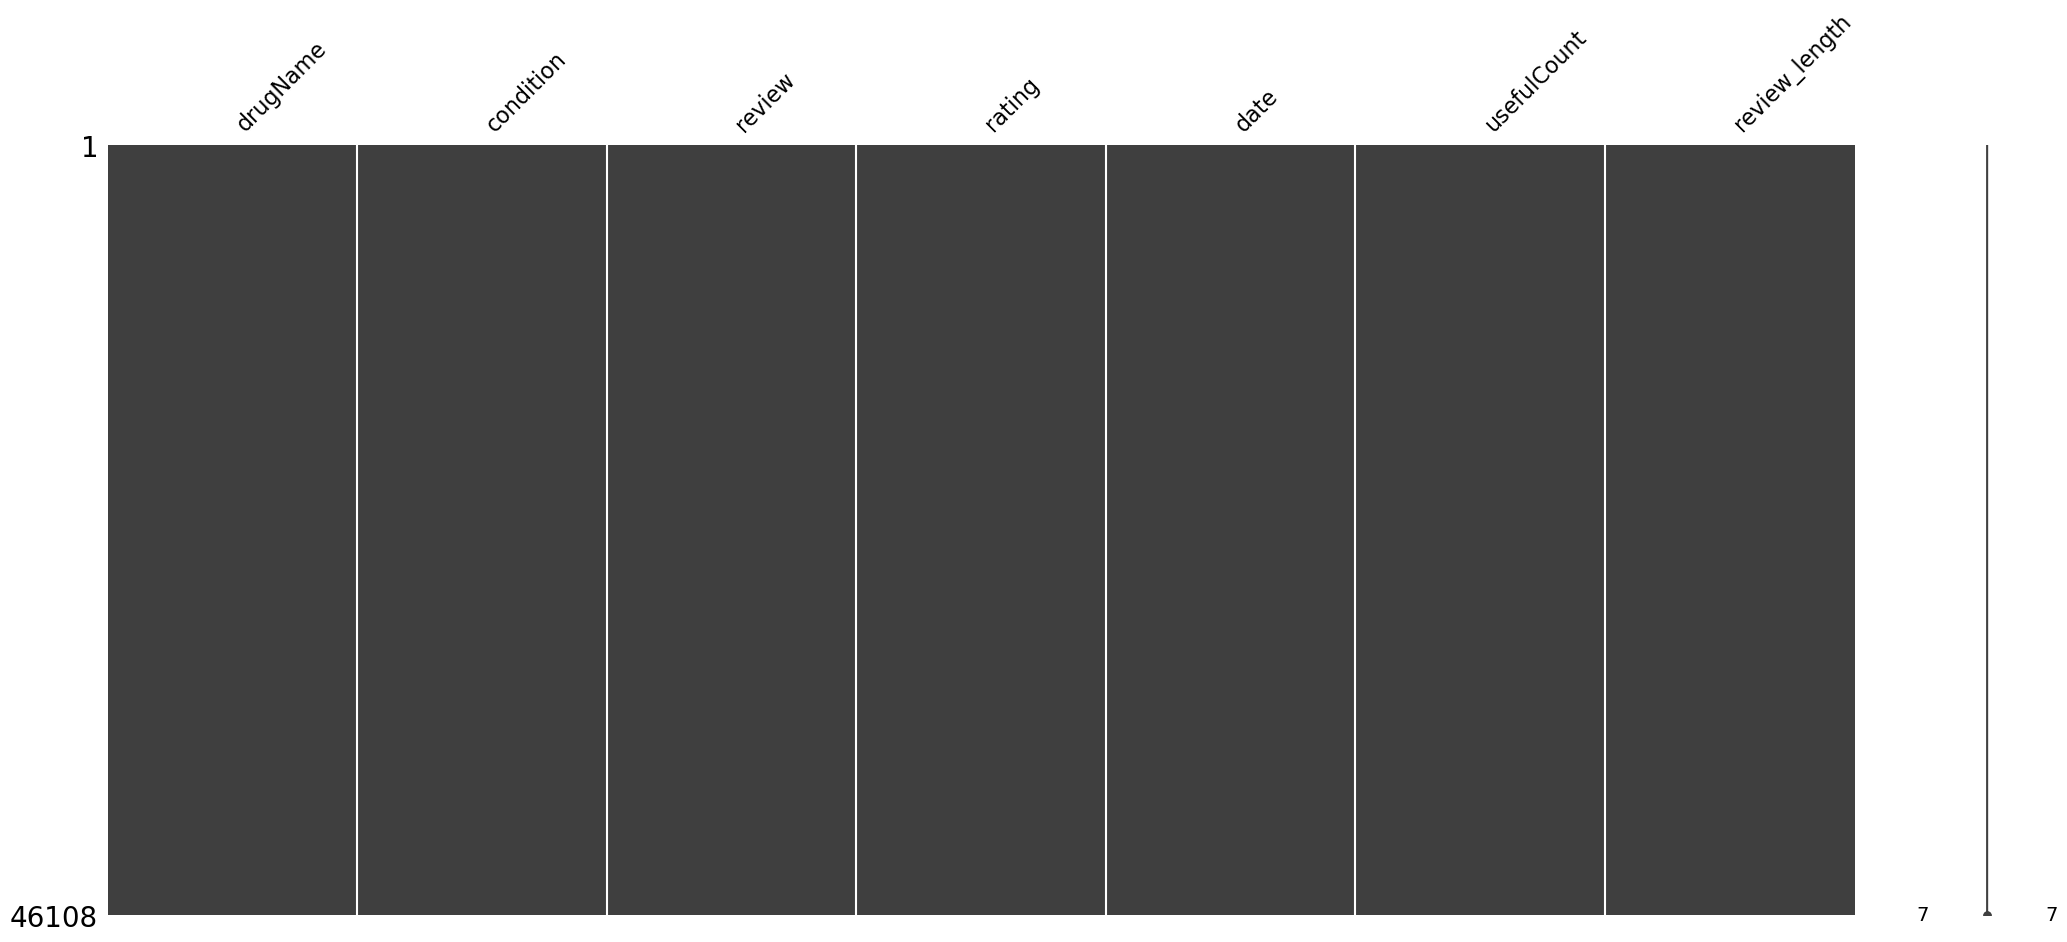

In [4]:
import missingno as msno
msno.matrix(drug)
plt.show()

       rating                review_length                  usefulCount  \
         mean median max min          mean median   max min        mean   
rating                                                                    
1         1.0    1.0   1   1     90.853663   88.0   559  31   14.174345   
2         2.0    2.0   2   2     93.939842   92.0   405  31   14.943787   
3         3.0    3.0   3   3     91.722941   90.0   346  31   14.320559   
4         4.0    4.0   4   4     95.719008   94.5   287  31   14.476584   
5         5.0    5.0   5   5     97.179616   99.0   374  31   15.187135   
6         6.0    6.0   6   6     96.012903   96.0   368  31   17.963978   
7         7.0    7.0   7   7     97.892622  101.0   233  31   20.195398   
8         8.0    8.0   8   8     97.537710   99.0   285  31   24.427070   
9         9.0    9.0   9   9     98.331661  100.0   511  31   25.758154   
10       10.0   10.0  10  10     94.737391   94.0  1162  31   26.671337   

                        

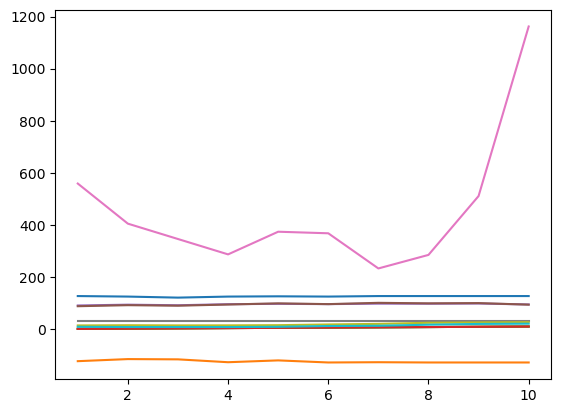

In [5]:
#drug.info()
grp=drug.groupby("rating")[['rating','review_length','usefulCount']].agg([np.mean,np.median,max,min])
print (grp)

plt.plot(grp)
plt.show()

In [7]:
drug.pivot_table(values='review_length',index="rating",columns='usefulCount',fill_value=0,margins=True,aggfunc=[np.median,np.mean,np.std])

median                                                             \
usefulCount   -128   -127   -126   -125   -124   -123   -122   -121 -120 -119   
rating                                                                          
1              0.0    0.0    0.0    0.0    0.0  129.5    0.0    0.0  134   94   
2              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0    0   
3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0    0   
4              0.0   61.0    0.0    0.0    0.0   74.0    0.0    0.0    0    0   
5              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   67    0   
6            140.0    0.0    0.0   78.5   78.0    0.0    0.0    0.0    0    0   
7              0.0  103.0    0.0   37.0   40.0   69.0   67.0  152.0    0   31   
8             94.5    0.0   91.0  113.5  118.5    0.0  140.0  111.0   95  124   
9             59.0   54.5  101.0   40.5  107.0   62.0   69.0  105.5  122   76   
10            96.5  101.0   95.5  105.0  104.0   93.5  102.0   84.0   82  123   
All           88.0   89.0   97.0  105.0  103.0   74.0   93.5   98.0  110  123   

             ...        std                                              \
usefulCount  ...        119        120        121        122        123   
rating       ...                                                          
1            ...   0.000000   0.000000   0.000000   4.949747  33.941125   
2            ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3            ...   0.000000   0.000000   0.000000   0.000000   0.000000   
4            ...   0.000000   0.000000   0.000000   0.000000   0.000000   
5            ...   0.000000   0.000000   0.000000   0.000000   0.000000   
6            ...   0.000000   0.000000  45.961941   0.000000   0.000000   
7            ...   0.000000  14.131525   0.000000   0.000000   0.000000   
8            ...   5.856620  20.840665  41.008129   0.000000  22.992752   
9            ...  38.787578  32.852702  38.301436  29.845435  13.435029   
10           ...  33.743712  33.785537  25.964348  36.460696  36.157550   
All          ...  33.668740  29.164340  29.972094  34.897370  32.229145   

                                                                    
usefulCount        124        125        126        127        All  
rating                                                              
1             0.000000   0.000000  19.000000   0.000000  38.419181  
2             0.000000   0.000000   0.000000   0.000000  37.272253  
3             0.000000   0.000000   0.000000   0.000000  36.572129  
4             0.000000   0.000000   0.000000   0.000000  36.362041  
5             0.000000   0.000000   0.000000   0.000000  36.228709  
6             0.000000   0.000000   0.000000   0.000000  36.665034  
7             0.000000   0.000000   0.000000   0.000000  36.127067  
8             8.082904  35.594943  37.832526  44.974437  35.819226  
9            30.100018  32.522300  37.466874  41.948778  37.562682  
10           30.470770  29.349791  27.294612  43.805305  38.965567  
All          28.898865  32.645214  32.140317  41.873591  37.716530  

[11 rows x 743 columns]

In [8]:
drug.isna().any()

drugName         False
condition        False
review           False
rating           False
date             False
usefulCount      False
review_length    False
dtype: bool

In [6]:
#d=pd.DataFrame(np.quantile(drug['usefulCount'],np.linspace(0,1,10)))
#d.set_index(np.linspace(1,11),inplace=True)
#d
from scipy.stats import uniform
uni=uniform.rvs(size=1000)
uni
#drug.sample(5,replace=True)

array([0.5532577 , 0.81785881, 0.67545391, 0.90502884, 0.91146491,
       0.32840146, 0.52605504, 0.17451604, 0.86746728, 0.57667179,
       0.36883782, 0.02287681, 0.21553265, 0.38254736, 0.06199424,
       0.8594522 , 0.12331819, 0.85987104, 0.96211718, 0.45404038,
       0.69836337, 0.52466745, 0.07908461, 0.6455372 , 0.1827537 ,
       0.50380594, 0.66344504, 0.40492968, 0.71939333, 0.52837226,
       0.08640998, 0.04126125, 0.98332057, 0.0251794 , 0.73200904,
       0.86875828, 0.54972335, 0.94424458, 0.76979482, 0.35189867,
       0.72889553, 0.50566404, 0.68197313, 0.78278942, 0.02709863,
       0.51571733, 0.1307349 , 0.88597846, 0.47617216, 0.2046439 ,
       0.41572924, 0.86396003, 0.99054387, 0.16621483, 0.28372473,
       0.88580039, 0.49446266, 0.4162469 , 0.46705587, 0.23832232,
       0.62651773, 0.88085875, 0.70044083, 0.32580235, 0.13575058,
       0.00771767, 0.33376692, 0.77167478, 0.87760067, 0.44464223,
       0.75852584, 0.50814717, 0.76689542, 0.1847642 , 0.36817

/Users/Mehr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


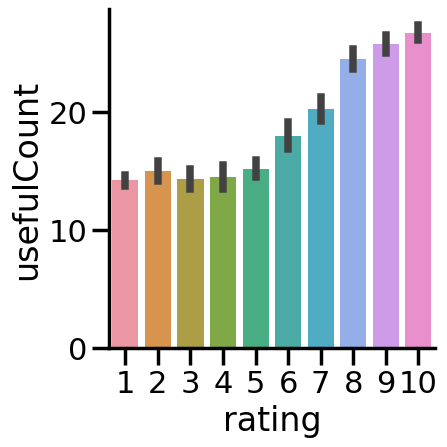

In [10]:
sns.set_palette("Purples")
sns.set_context("poster")
sns.catplot(x='rating',y='usefulCount',data=drug,kind='bar')

In [11]:
cols=['rating','usefulCount','review_length']
pd.crosstab(drug['rating'],drug.sort_values(by="usefulCount",ascending=False)['drugName'].head(20) ,margins=False)
#sns.heatmap(drug[cols].corr(),annot=True,cmap='Purples',cbar=False, linewidths=0.5)

drugName,Buspirone,Dalfampridine,Deplin,Effexor XR,Elavil,Fetzima,Gabapentin,Guaifenesin,Mucinex,Orlistat,Phentermine,Pitavastatin,Pregabalin,Risedronate,Sertraline,Thyroid desiccated,Topamax,Topiramate,Trazodone,Wellbutrin
rating,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1
10,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0


In [12]:
drug.sort_values(by="usefulCount",ascending=False)['drugName'].head(10) 

28210            Pregabalin
40253    Thyroid desiccated
17278            Wellbutrin
33065            Effexor XR
21408           Guaifenesin
20434            Topiramate
21810                Deplin
11673          Pitavastatin
18961            Sertraline
19598               Fetzima
Name: drugName, dtype: category
Categories (2283, object): ['A / B Otic', 'Abacavir / dolutegravir / lamivudine', 'Abacavir / lamivudine', 'Abatacept', ..., 'depo-subQ provera 104', 'ella', 'femhrt', 'pHisoHex']

In [7]:
drug.groupby('drugName')['usefulCount'].agg(['mean','std','min','max']).sort_values(by='mean',ascending=False).head(10)

,mean,std,min,max
drugName,,,,
Uroxatral,120.0,NaN,120,120
Rogaine Women's,116.0,NaN,116,116
Sotalol Hydrochloride AF,113.0,NaN,113,113
Lodine,108.0,NaN,108,108
Degarelix,102.0,NaN,102,102
Lasix,101.5,17.136705,85,122
Adipost,100.0,NaN,100,100
Zestril,96.5,12.020815,88,105
Clozaril,93.5,44.547727,62,125


In [14]:
drug[drug['condition'].str.contains('bipolar')]['drugName'].value_counts().head(10)

drugName
Lamotrigine     123
Lurasidone       88
Quetiapine       85
Lamictal         78
Latuda           72
Lithium          45
Aripiprazole     44
Ziprasidone      41
Asenapine        41
Abilify          39
Name: count, dtype: int64

In [8]:
drug_cat=['bipolar','depression','anxiety']
sleep='sleep'
bipolar='bipolar'
depression='depression'
anxiety='anxiety'
pain='pain'

condition=[
    
    (drug['condition'].str.contains(bipolar)),
    (drug['condition'].str.contains(depression)),
    (drug['condition'].str.contains(anxiety)),
    
]

In [16]:
drug['drugcat']=np.select(condition,drug_cat,default='other') 

<Axes: xlabel='drugcat'>

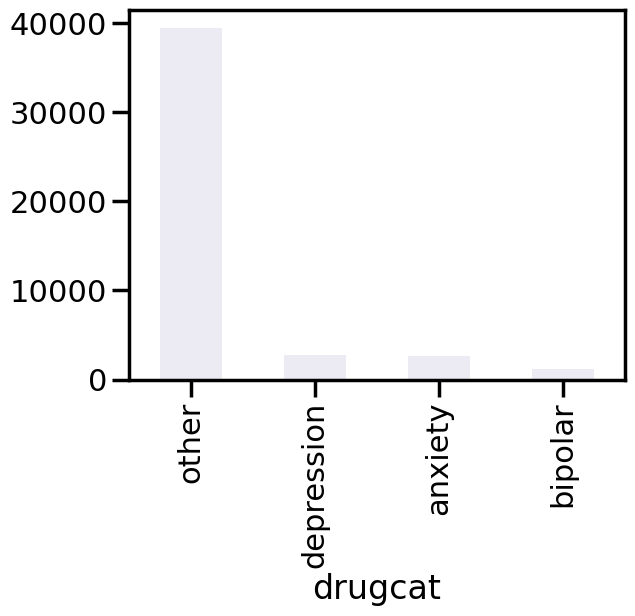

In [17]:
drug['drugcat'].value_counts().plot(kind='bar')

In [18]:
drug.to_feather("/Users/Mehr/Desktop/data/drug.feather")

In [19]:
df=pd.read_feather("/Users/Mehr/Desktop/data/drug.feather")

In [20]:
print(df.memory_usage(deep=True).sum())
print(drug.memory_usage(deep=True).sum())


30080380
30349133


In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model=ols('usefulCount ~ review_length + rating',data=drug).fit()
model.summary()
summary= model.get_influence().summary_frame()
leverage=summary['hat_diag']
cook=summary['cooks_d']



/Users/Mehr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


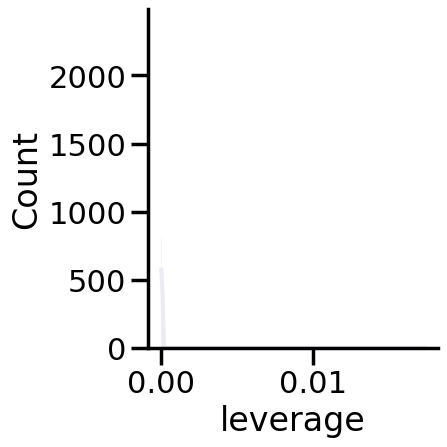

In [22]:
res=pd.DataFrame({'leverage':leverage,'cook':cook})#.sort_values(by='leverage',ascending=False).head(10)
sns.displot(res['leverage'],kde=True)

In [23]:
actual_rep=drug['usefulCount']
#pred=np.round(model.predict())
#out=pd.DataFrame({'actual':actual_rep,'pred':pred}) 
model.summary()
model.predict()

array([27.32943552, 24.73272073, 23.75162707, ..., 24.10024899,
       22.02419653, 14.14246294])

In [24]:
import requests

url="http://www.wikipedia.org"
r=requests.get(url).text
#text=r.text

print(r)

<!DOCTYPE html>
<html lang="en" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/4.0/">
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-8bb90067.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background-positi

In [25]:
from bs4 import BeautifulSoup
import json
import requests
import pandas as pd

movies = []

# for year in range(2014, 2025):
#     url = f'http://www.omdbapi.com/?apikey=72bc447a&y={year}'
#     r = requests.get(url)
#     data = r.json()
#     if 'Search' in data:
#         movies.extend(data['Search'])

# dfm = pd.DataFrame(movies)

#====================
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=inception'
r=requests.get(url)
#print(r.text)
js=r.json()
#print(js)

for k in js.keys():
    print(k + ':', js[k])

js['Title']['Year']['Rating']
html_doc=r.text
soup=BeautifulSoup(html_doc)
#print(soup.text)


#print(soup.prettify())

#print(soup.find_all('a'))
# i=0
# for link in soup.find_all('a'):
#     print(link.get('img'))
#     i+=1
# print(i)

Title: Inception
Year: 2010
Rated: PG-13
Released: 16 Jul 2010
Runtime: 148 min
Genre: Action, Adventure, Sci-Fi
Director: Christopher Nolan
Writer: Christopher Nolan
Actors: Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page
Plot: A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.
Language: English, Japanese, French
Country: United States, United Kingdom
Awards: Won 4 Oscars. 159 wins & 220 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BMjAxMzY3NjcxNF5BMl5BanBnXkFtZTcwNTI5OTM0Mw@@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '74/100'}]
Metascore: 74
imdbRating: 8.8
imdbVotes: 2,504,988
imdbID: tt1375666
Type: movie
DVD: 20 Jun 2013
BoxOffice: $292,587,330
Production: N/A
Website: N

TypeError: string indices must be integers, not 'str'

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE

X=drug[['review_length','rating','usefulCount']]
y=drug['condition'].cat.codes


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
gb = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)
gbc=GradientBoostingClassifier(max_depth=4, 
            subsample=0.1,
            max_features=0.55,
            n_estimators=20,
            random_state=2)

#X_train=X_train.values.reshape(-1,3)
#y_train=y_train.values.reshape(-1,1)
#X_train.reshape(-1,3)
print(X_train.shape)
print(y_train[2])

(32275, 3)
646


In [ ]:

gb.fit(X_train,y_train)
#gbc.fit(X_train,y_train)


y_pred=gb.predict(X_test)
#y_pred_c=gbc.predict(X_test)

print(mean_squared_error(y_test,y_pred))
#print(mean_squared_error(y_test,y_pred_c))

mse_test = MSE(y_test,y_pred)
#mse_test_c = MSE(y_test,y_pred_c)


# Compute test set RMSE
rmse_test = mse_test**(1/2)
#rmse_test_c = mse_test_c**(1/2)

#print(f" the accuracy is {accuracy_score(y_test,y_pred)}")
#pd.Categorical(y_pred,categories=y.cat.categories)
pd.DataFrame({'actual':y_test,'of Regresso pred':y_pred}).head(10)
#pd.DataFrame({'actual':y_test,'of Classifer prediction ':y_pred_c}).head(10)

# Print rmse_test
print('Test set RMSE of GB regressor: {:.3f}'.format(rmse_test))
#print('Test set RMSE of GB classifier: {:.3f}'.format(rmse_test_c))

32006.614005955897
Test set RMSE of GB regressor: 178.904


In [ ]:
cat_map = dict(enumerate(drug['condition'].cat.categories))
cat_map
# how to make a map of cateories
# category_dict = {
#     1: "red",
#     2: "blue",
#     3: "green",
#     4: "red",
#     5: "blue",
#     6: "green"
# }
y_pred_mapped=pd.Series(y_pred).map(cat_map)
# # use the map method to create a new column with the categories
# df["category"] = df["value"].map(category_dict)
y_pred_mapped

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
13828    NaN
13829    NaN
13830    NaN
13831    NaN
13832    NaN
Length: 13833, dtype: object

<Axes: xlabel='rating'>

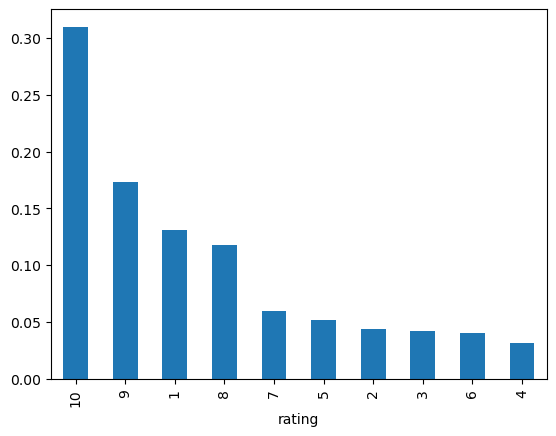

In [132]:
import numpy as np
x=X.iloc[:30,:].copy()

def dot(col):
    return np.log(col)*np.sin(col**2)* np.sqrt(col)


x[x['rating'].isin([6,7])]
x.quantile([0.25,0.5,0.75])
x.mean()
#x[['usefulCount','rating']].agg([dot])
#x[['usefulCount','rating']].apply(dot,axis=0)
x.drop_duplicates(subset=['rating','usefulCount'],keep='first')
X['rating'].value_counts(normalize=True,sort=True).plot(kind='bar')

In [7]:
import scipy.stats as stats
from scipy.stats import shapiro

x=drug['usefulCount']
y=drug['review_length']


bp_before = [120, 122, 125, 130, 128, 130, 133, 129, 132, 120, 123]
bp_after = [115, 118, 122, 125, 121, 123, 126, 124, 121, 119, 122]

#two sample ttest
print(stats.ttest_ind(a=x, b=y) )

#paired ttest
print(stats.ttest_rel(a=x, b=y) )


stat, p = shapiro(x)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

TtestResult(statistic=-322.65921557179433, pvalue=0.0, df=92214.0)
TtestResult(statistic=-318.6354439240181, pvalue=0.0, df=46107)
stat=0.832, p=0.000
Probably not Gaussian


In [120]:
import timeit
#drug.query('condition== bipolar and rating >= 5 and usefulCount==34 ').head(10)
#drug.query("index<50")
#drug['condition']=drug['condition'].str.replace('disorde', 'disorder')

#drug.melt(id_vars='condition',value_vars=['rating','usefulCount','review_length'],var_name='features',value_name='values')
#drug.query('condition=="bipolar disorder"').melt(id_vars=['condition','usefulCount'],value_vars=['rating','review_length'],var_name='features',value_name='values')
#drug[drug['condition'].str.contains('bipolar')].groupby('drugName')['review_length'].agg(['mean','std','min','max']).sort_values(by='mean',ascending=False).head(10)
#drug[drug['condition'].str.contains('bipolar')]['condition'].value_counts()
#drug.query('condition=="bipolar disorde"')['condition']

drug.query('condition=="bipolar disorder"').groupby('drugName')['usefulCount'].agg(['mean','std','min','max']).sort_values(by='mean',ascending=False).head(10)
#drug.query('condition=="bipolar disorder"')
#drug[drug['condition'].str.contains('bipolar')]


5.48 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
from scipy.cluster.vq import kmeans,vq
df=drug.query('condition=="bipolar disorder"').drop(['drugName','condition','review','date'],axis=1)   
df.head(10)
# Z=kmeans(df,3)
# a,b=vq(df,Z)

# sns.scatterplot(x='rating',y='usefulCount',data=df,hue='drugName')


,rating,usefulCount,review_length
17,1,27,71
19,6,18,133
20,7,1,88
31,8,75,83
78,8,16,91
131,5,0,129
156,9,23,75
217,10,11,79
334,7,48,110
338,2,10,100


In [2]:
drug.describe(exclude='number')

,drugName,condition,review,date
count,46108,46108,46108,46108
unique,2283,652,41467,NaN
top,Levonorgestrel,birth control,"""i've recently got my second implant inserted....",NaN
freq,1224,9257,3,NaN
mean,NaN,NaN,NaN,2014-08-16 01:52:39.017957888
min,NaN,NaN,NaN,2008-02-25 00:00:00
25%,NaN,NaN,NaN,2012-09-19 00:00:00
50%,NaN,NaN,NaN,2015-07-27 00:00:00
75%,NaN,NaN,NaN,2016-09-08 00:00:00
max,NaN,NaN,NaN,2017-12-12 00:00:00


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
#drug.melt(id_vars='condition',value_vars=['rating'])
drug['review_length'].std()
np.var(drug['review_length'],ddof=1)
np.std(drug['review_length'],ddof=1)
np.quantile(drug['review_length'],np.linspace(0,1,5))
np.mean(drug['review_length'])
#plt.boxplot(drug['review_length'])
long_review=drug.query("review_length>1000")['review']
#print([i for i in long_review])
from scipy.stats import iqr
iqr(drug['review_length'])
tresh=np.quantile(drug['review_length'],.75)+1.5*iqr(drug['review_length'])
tresh

drug[drug['review_length']>tresh].sort_values(by='review_length',ascending=False).head(10)

,drugName,condition,review,rating,date,usefulCount,review_length
38522,Fluoxetine,obsessive compulsive disorde,"""i don’t find a lot of positive stories about ...",10,2017-05-26,-108,1162
7154,Duloxetine,depression,"""•\t19 apr. 2016\r\r\n\r\r\nbegan initial dose...",1,2016-04-22,0,559
2638,Suboxone,opiate dependence,"""my personal experience with suboxone is good ...",9,2017-05-27,24,511
792,Buprenorphine / naloxone,opiate dependence,"""my personal experience with suboxone is good ...",9,2017-05-27,24,511
39632,Magnesium citrate,constipation,"""holy guacamole batman it worked! but boy i...",10,2017-03-17,69,506
187,Polyethylene glycol 3350 with electrolytes,bowel preparation,"""my colonoscopy was booked in for late afterno...",10,2016-03-17,42,498
30366,Escitalopram,depression,"""i just started this medicine 3 days ago and i...",9,2015-08-09,107,490
26028,Sertraline,social anxiety disorde,"""i have dealt with ups and downs, anxiety, soc...",9,2017-05-15,118,447
16162,Topiramate,migraine prevention,"""i felt compelled to write a review, as i was ...",1,2015-10-31,33,417
26483,Clonazepam,anxiety,"""yes, this medication works. it works very wel...",2,2016-06-11,-101,405


In [46]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
sides=[]
def total_side_effects(column):
    names = re.split ("(?= [a-z])", column)
    return names

def words_process(column):
    word_count=len(re.findall(r'\w+', column))
    #wv=TfidfVectorizer(column)
    
    return word_count


print(words_process(drug['review'][3]))
for side in drug['review']:
    sides.append(re.split ("(?= [a-z])", side))
    
unique_sides = set([item for sublist in sides for item in sublist])
#unique_sides

151
